In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
import xgboost as xgb 

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [14]:
df=pd.read_csv("Traffic.csv")

In [15]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [17]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CarCount'>

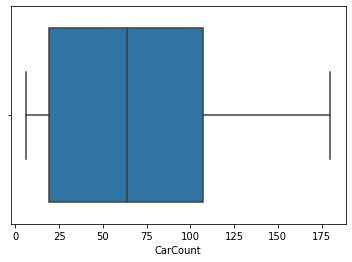

In [18]:
sns.boxplot(df['CarCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BikeCount'>

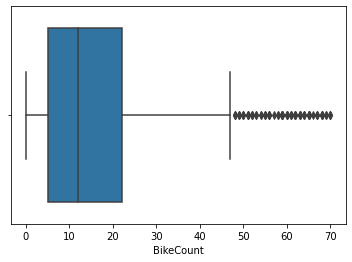

In [19]:
sns.boxplot(df['BikeCount'])

In [20]:
q1=df['BikeCount'].quantile(0.25)

In [21]:
q3=df['BikeCount'].quantile(0.75)

In [22]:
IQR=q3-q1

In [23]:
lower=q1-1.5*IQR

In [24]:
upper=q3+1.5*IQR

In [25]:
df=df[(df['BikeCount']>lower) & (df['BikeCount']<upper)]

In [26]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusCount'>

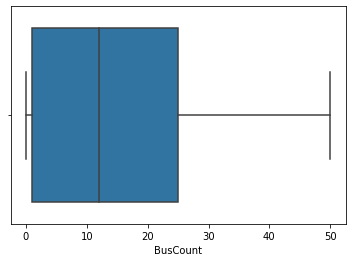

In [27]:
sns.boxplot(df['BusCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TruckCount'>

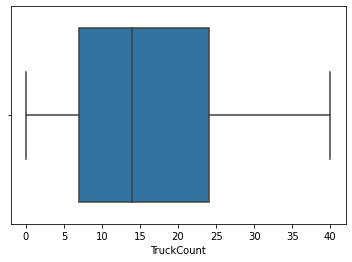

In [28]:
sns.boxplot(df['TruckCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

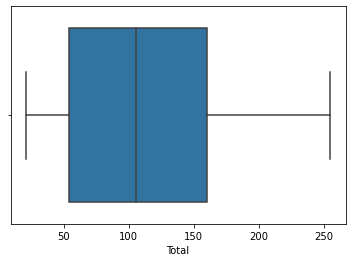

In [29]:
sns.boxplot(df['Total'])

In [30]:
df.shape

(2899, 9)

In [31]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [32]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


<AxesSubplot:xlabel='Traffic Situation', ylabel='count'>

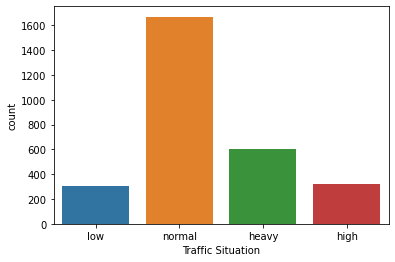

In [33]:
sns.countplot(x=df['Traffic Situation'])

<AxesSubplot:xlabel='Traffic Situation', ylabel='count'>

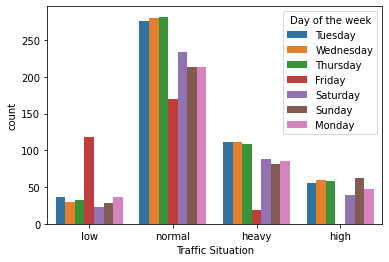

In [34]:
sns.countplot(x=df['Traffic Situation'],hue=df['Day of the week'])

In [35]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


<AxesSubplot:xlabel='Traffic Situation', ylabel='CarCount'>

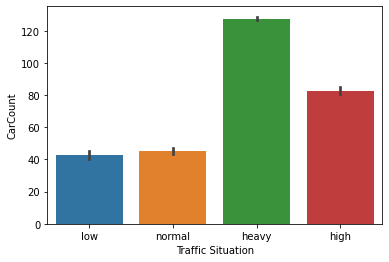

In [36]:
sns.barplot(x=df['Traffic Situation'],y=df['CarCount'])

<AxesSubplot:xlabel='Traffic Situation', ylabel='BikeCount'>

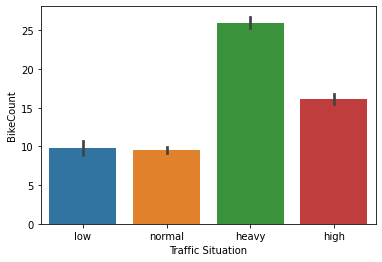

In [37]:
sns.barplot(x=df['Traffic Situation'],y=df['BikeCount'])

<AxesSubplot:xlabel='Traffic Situation', ylabel='BusCount'>

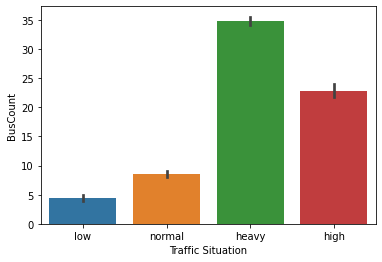

In [38]:
sns.barplot(x=df['Traffic Situation'],y=df['BusCount'])

<AxesSubplot:xlabel='Traffic Situation', ylabel='TruckCount'>

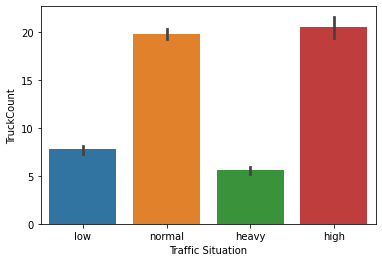

In [39]:
sns.barplot(x=df['Traffic Situation'],y=df['TruckCount'])

<AxesSubplot:xlabel='Traffic Situation', ylabel='Total'>

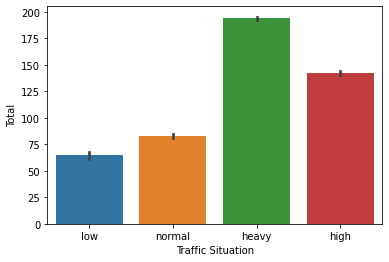

In [40]:
sns.barplot(x=df['Traffic Situation'],y=df['Total'])

<AxesSubplot:xlabel='Day of the week', ylabel='CarCount'>

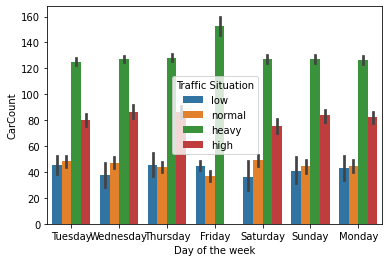

In [41]:
sns.barplot(x=df['Day of the week'],y=df['CarCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='BikeCount'>

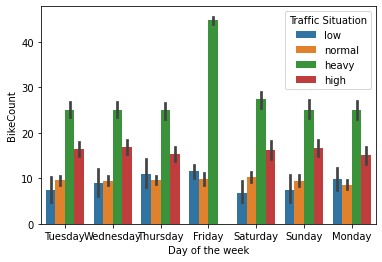

In [42]:
sns.barplot(x=df['Day of the week'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='BusCount'>

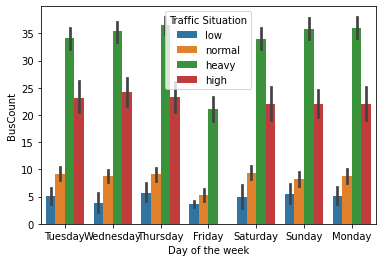

In [43]:
sns.barplot(x=df['Day of the week'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='TruckCount'>

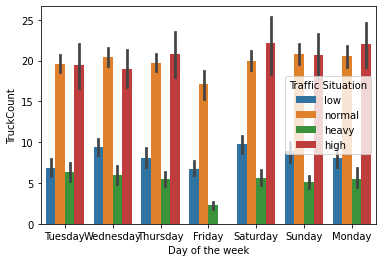

In [44]:
sns.barplot(x=df['Day of the week'],y=df['TruckCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='Total'>

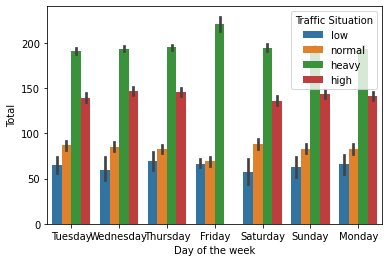

In [45]:
sns.barplot(x=df['Day of the week'],y=df['Total'],hue=df['Traffic Situation'])

In [46]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


<AxesSubplot:xlabel='Date', ylabel='Total'>

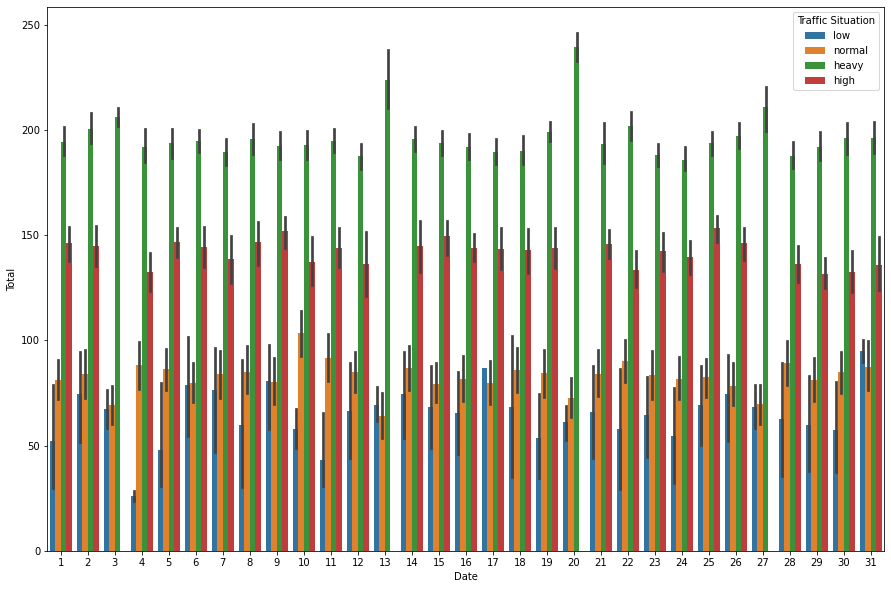

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Date'],y=df['Total'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='CarCount'>

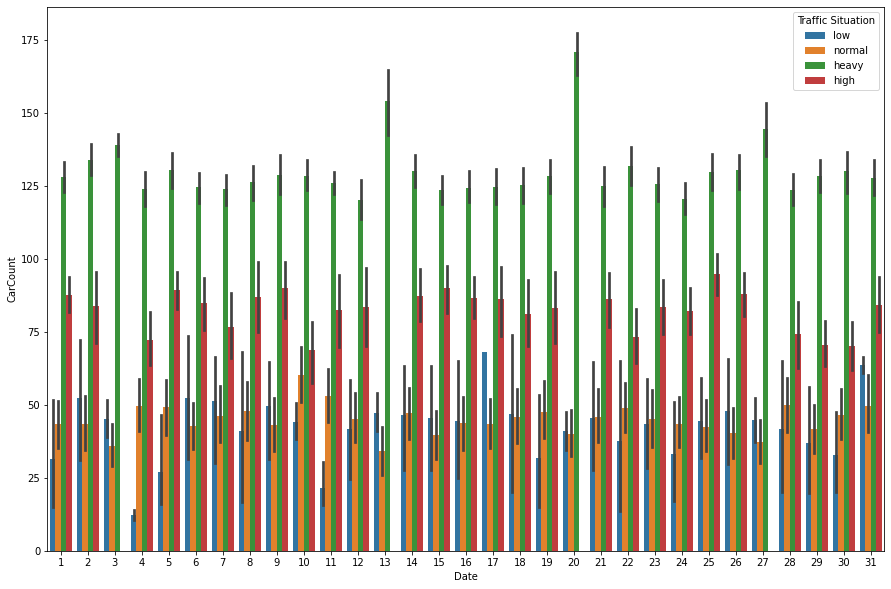

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Date'],y=df['CarCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='BikeCount'>

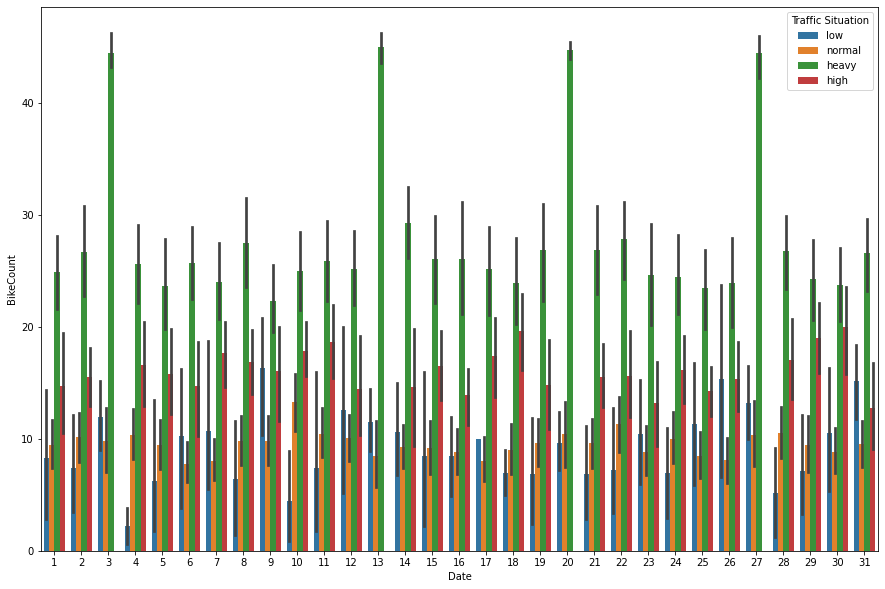

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Date'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='BusCount'>

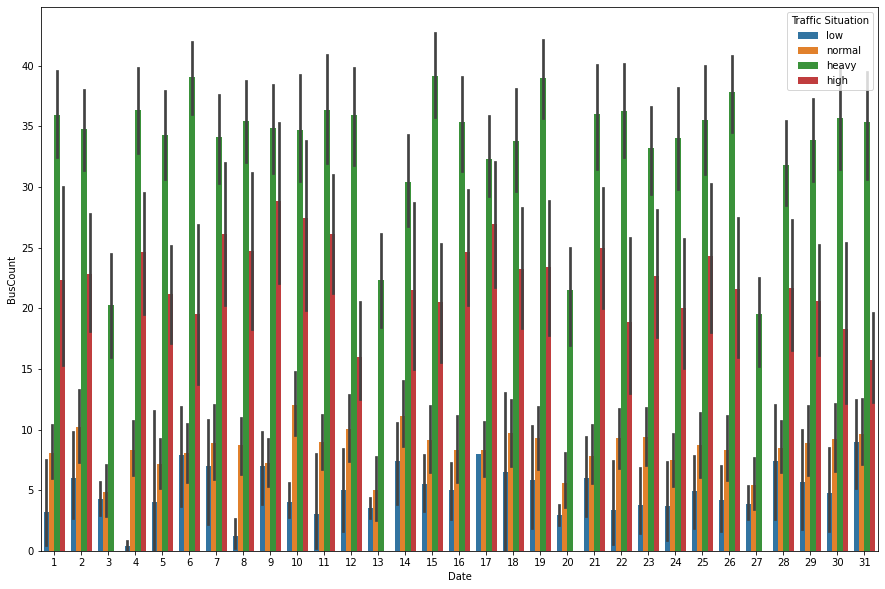

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Date'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='TruckCount'>

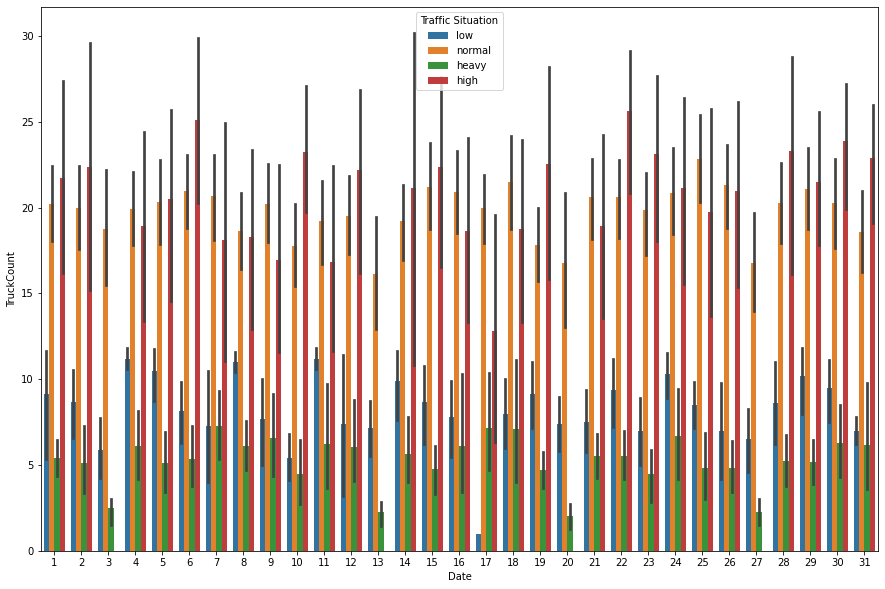

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Date'],y=df['TruckCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='Total'>

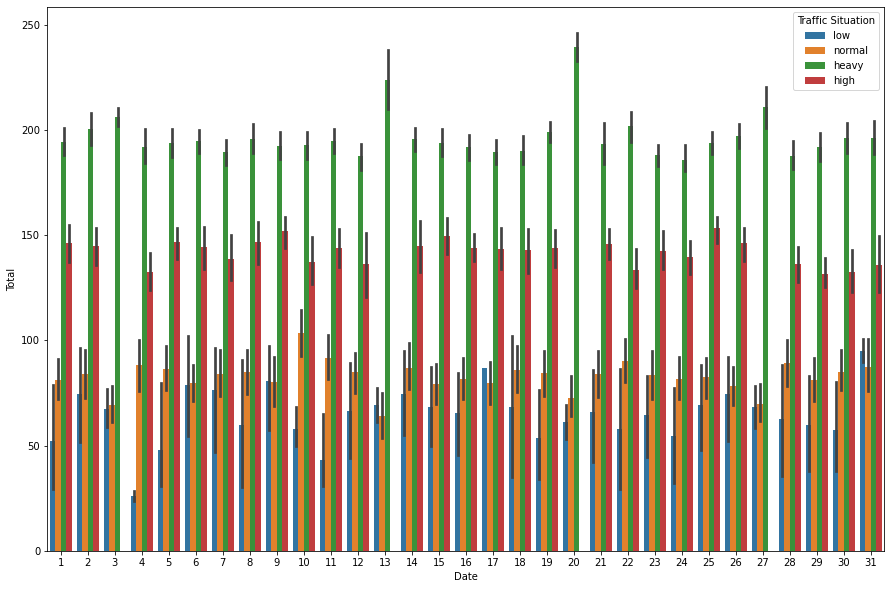

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Date'],y=df['Total'],hue=df['Traffic Situation'])

In [53]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [54]:
df['hour']=pd.to_datetime(df['Time']).dt.hour



C:\Users\himanshu\AppData\Local\Temp\ipykernel_5856\1057811429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=pd.to_datetime(df['Time']).dt.hour


In [55]:
df['Minute']=pd.to_datetime(df['Time']).dt.minute

C:\Users\himanshu\AppData\Local\Temp\ipykernel_5856\2886614754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute']=pd.to_datetime(df['Time']).dt.minute


In [56]:
df['Second']=pd.to_datetime(df['Time']).dt.second

C:\Users\himanshu\AppData\Local\Temp\ipykernel_5856\1145829591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Second']=pd.to_datetime(df['Time']).dt.second


In [57]:
df=df.drop('Time',axis=1)


In [58]:
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,Minute,Second
0,10,Tuesday,31,0,4,4,39,low,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,Thursday,16,3,1,36,56,normal,22,45,0
2972,9,Thursday,11,0,1,30,42,normal,23,0,0
2973,9,Thursday,15,4,1,25,45,normal,23,15,0
2974,9,Thursday,16,5,0,27,48,normal,23,30,0


<AxesSubplot:xlabel='Date', ylabel='CarCount'>

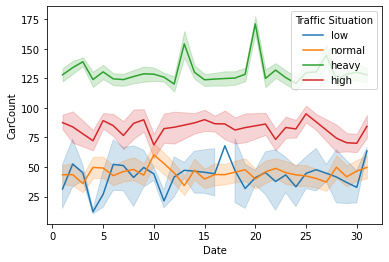

In [59]:
sns.lineplot(x=df['Date'],y=df['CarCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='BikeCount'>

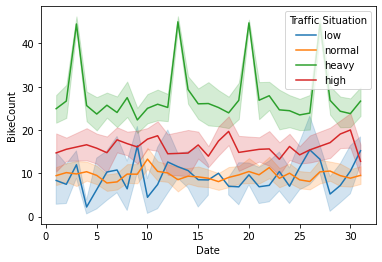

In [60]:
sns.lineplot(x=df['Date'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='BusCount'>

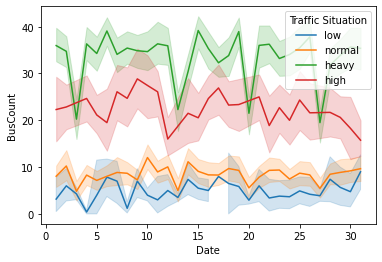

In [61]:
sns.lineplot(x=df['Date'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='TruckCount'>

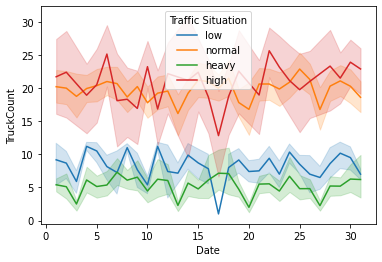

In [62]:
sns.lineplot(x=df['Date'],y=df['TruckCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Date', ylabel='Total'>

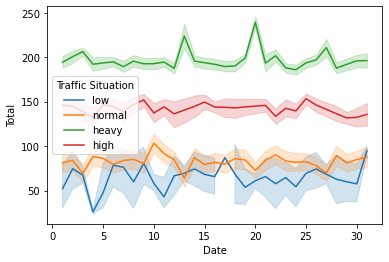

In [63]:
sns.lineplot(x=df['Date'],y=df['Total'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='Total'>

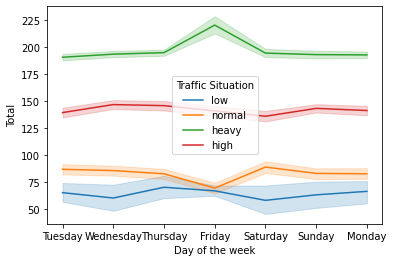

In [64]:
sns.lineplot(x=df['Day of the week'],y=df['Total'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='TruckCount'>

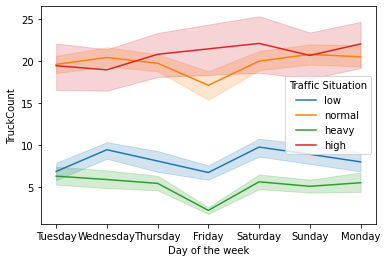

In [65]:
sns.lineplot(x=df['Day of the week'],y=df['TruckCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='BusCount'>

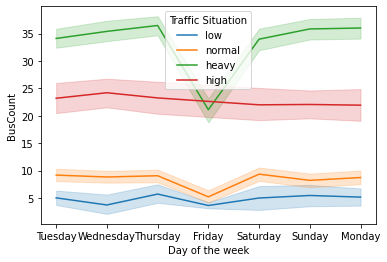

In [66]:
sns.lineplot(x=df['Day of the week'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='BikeCount'>

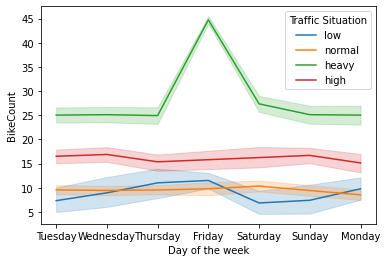

In [67]:
sns.lineplot(x=df['Day of the week'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='CarCount'>

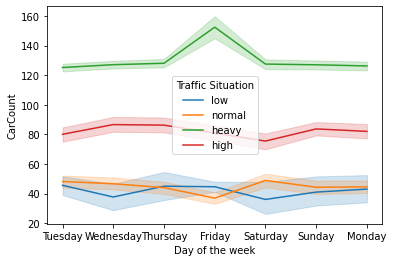

In [68]:
sns.lineplot(x=df['Day of the week'],y=df['CarCount'],hue=df['Traffic Situation'])

In [69]:
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,Minute,Second
0,10,Tuesday,31,0,4,4,39,low,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,Thursday,16,3,1,36,56,normal,22,45,0
2972,9,Thursday,11,0,1,30,42,normal,23,0,0
2973,9,Thursday,15,4,1,25,45,normal,23,15,0
2974,9,Thursday,16,5,0,27,48,normal,23,30,0


<AxesSubplot:xlabel='Day of the week', ylabel='CarCount'>

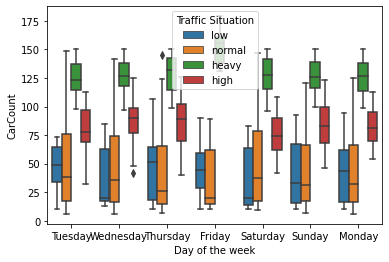

In [70]:
sns.boxplot(x=df['Day of the week'],y=df['CarCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='BikeCount'>

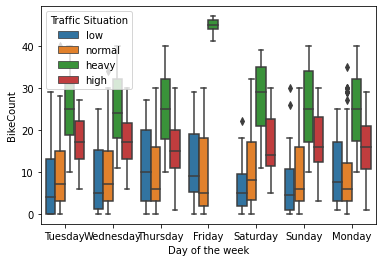

In [71]:
sns.boxplot(x=df['Day of the week'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='BusCount'>

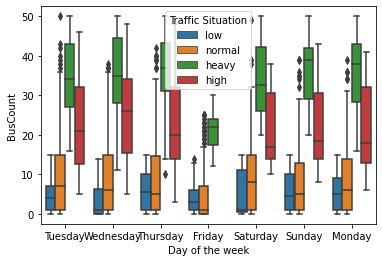

In [72]:
sns.boxplot(x=df['Day of the week'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='TruckCount'>

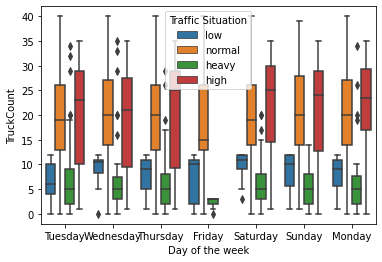

In [73]:
sns.boxplot(x=df['Day of the week'],y=df['TruckCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='Total'>

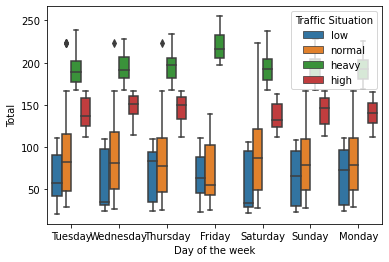

In [74]:
sns.boxplot(x=df['Day of the week'],y=df['Total'],hue=df['Traffic Situation'])

In [75]:
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,Minute,Second
0,10,Tuesday,31,0,4,4,39,low,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,Thursday,16,3,1,36,56,normal,22,45,0
2972,9,Thursday,11,0,1,30,42,normal,23,0,0
2973,9,Thursday,15,4,1,25,45,normal,23,15,0
2974,9,Thursday,16,5,0,27,48,normal,23,30,0


<AxesSubplot:xlabel='hour', ylabel='CarCount'>

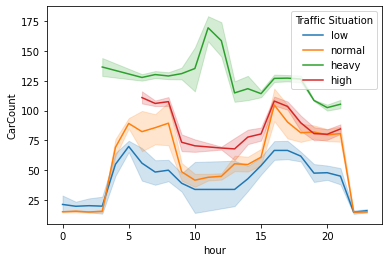

In [76]:
sns.lineplot(x=df['hour'],y=df['CarCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='hour', ylabel='BikeCount'>

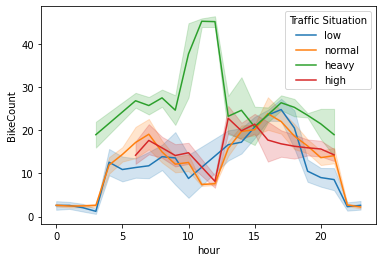

In [77]:
sns.lineplot(x=df['hour'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='hour', ylabel='BusCount'>

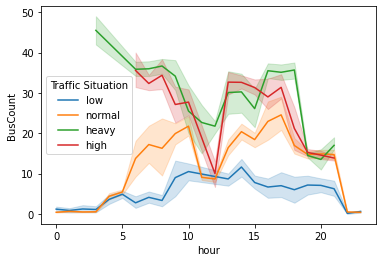

In [78]:
sns.lineplot(x=df['hour'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='hour', ylabel='TruckCount'>

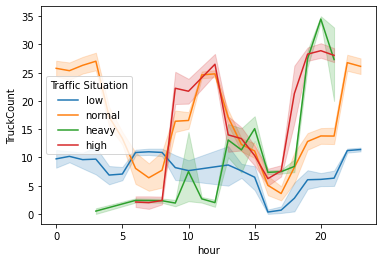

In [79]:

sns.lineplot(x=df['hour'],y=df['TruckCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='hour', ylabel='Total'>

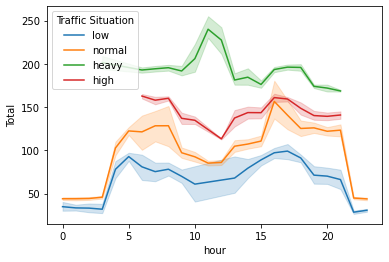

In [80]:

sns.lineplot(x=df['hour'],y=df['Total'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Minute', ylabel='CarCount'>

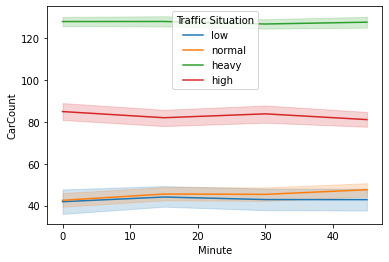

In [81]:
sns.lineplot(x=df['Minute'],y=df['CarCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Minute', ylabel='BikeCount'>

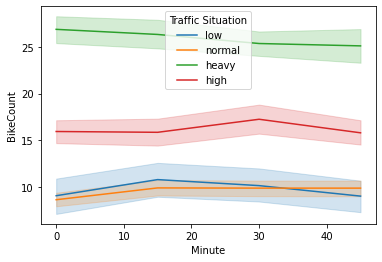

In [82]:
sns.lineplot(x=df['Minute'],y=df['BikeCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Minute', ylabel='BusCount'>

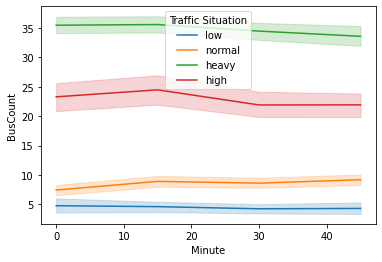

In [83]:
sns.lineplot(x=df['Minute'],y=df['BusCount'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Minute', ylabel='Total'>

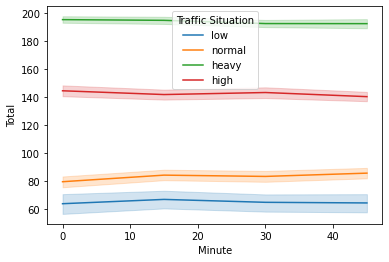

In [84]:
sns.lineplot(x=df['Minute'],y=df['Total'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Minute', ylabel='TruckCount'>

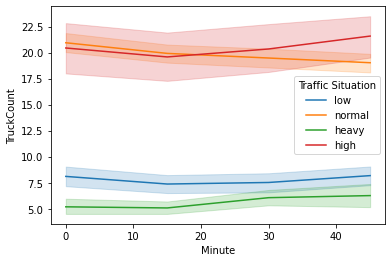

In [85]:
sns.lineplot(x=df['Minute'],y=df['TruckCount'],hue=df['Traffic Situation'])

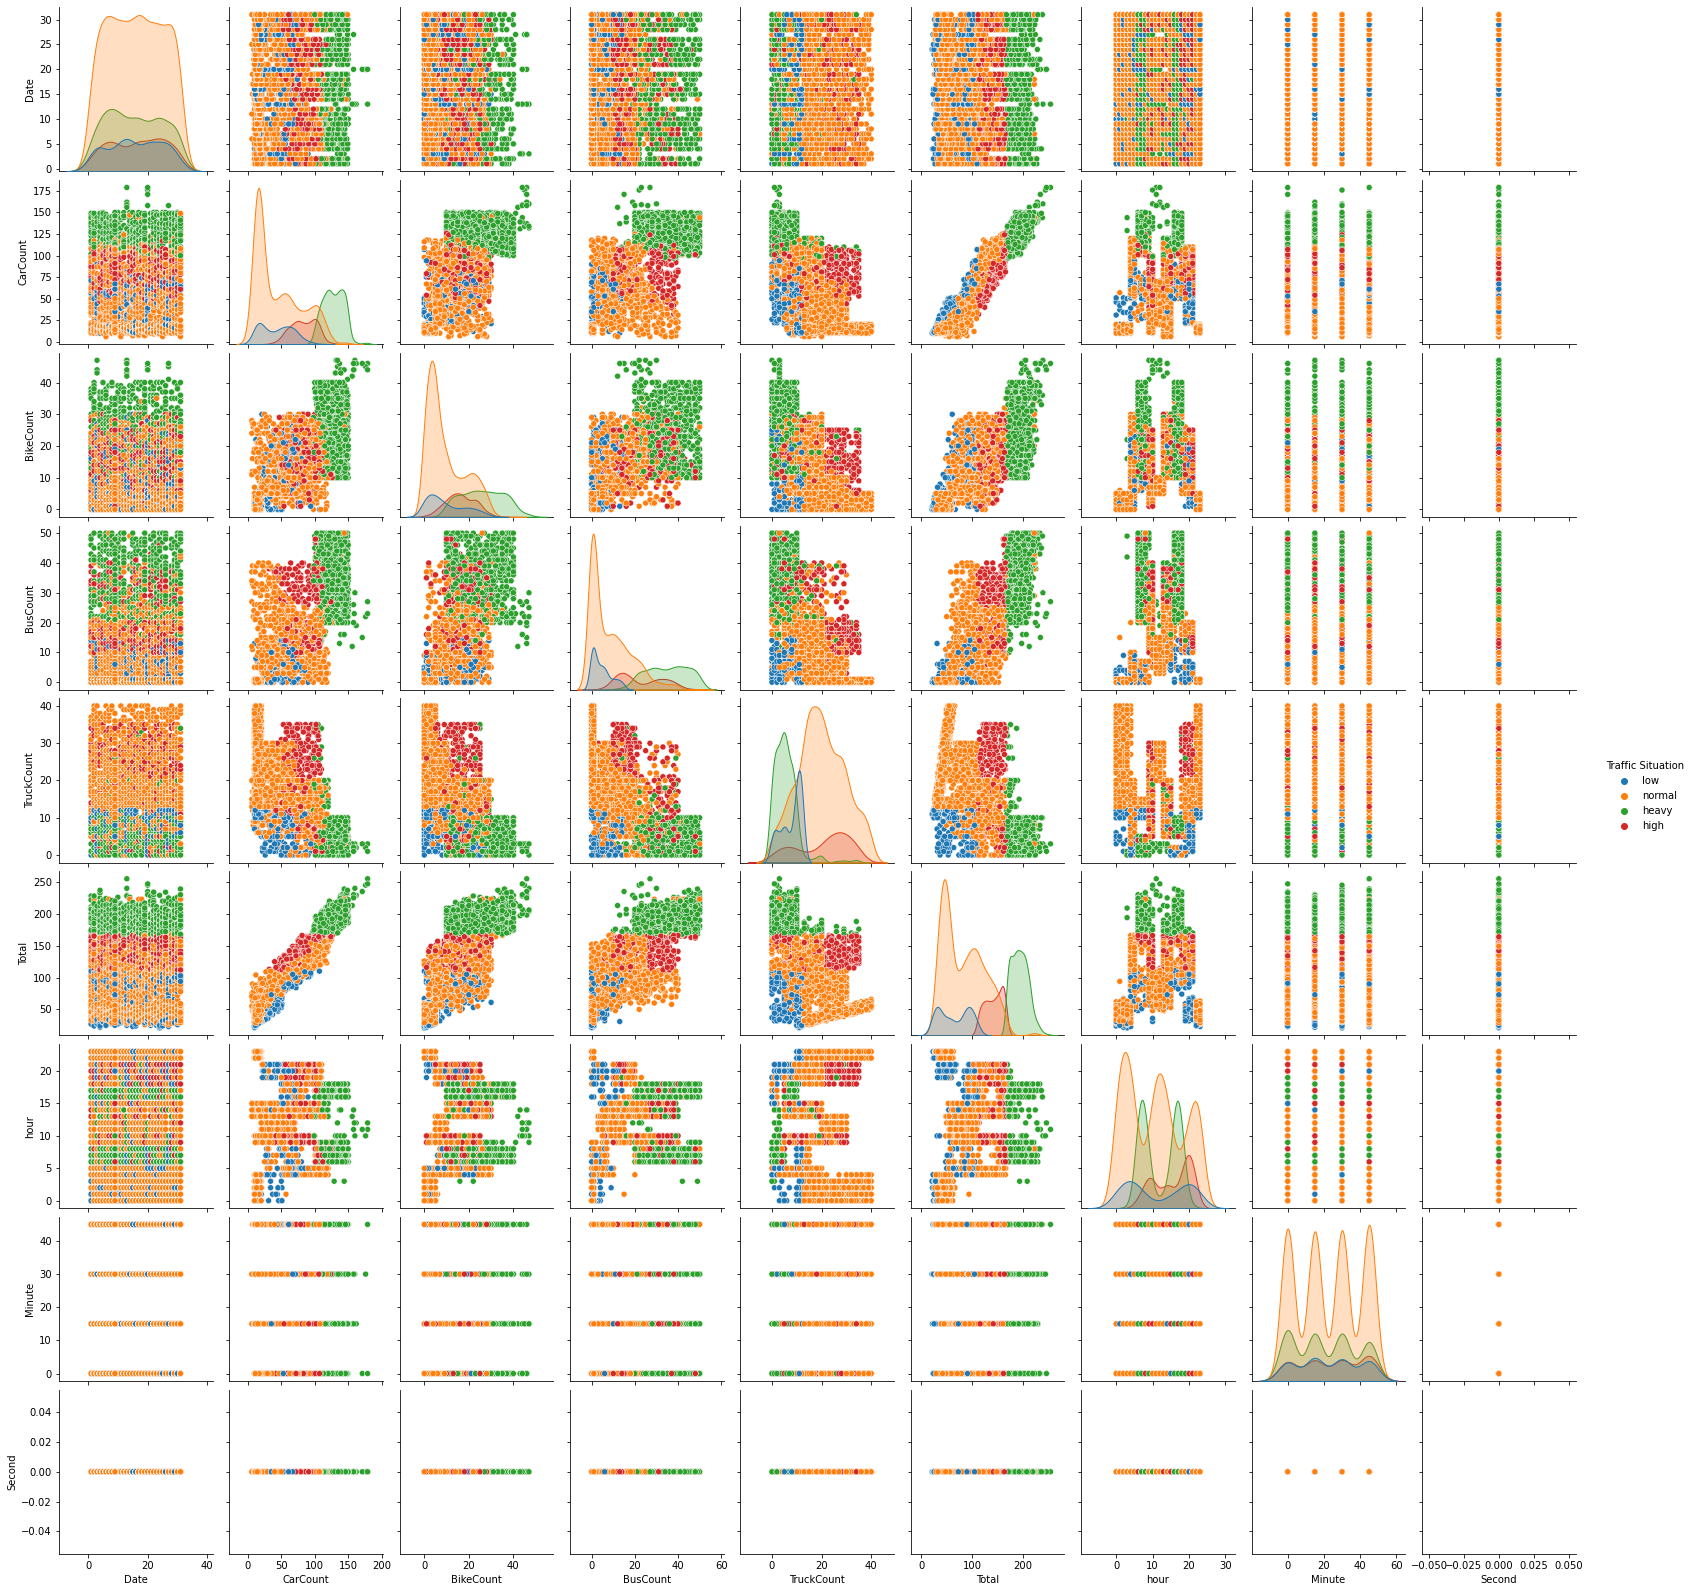

In [86]:
sns.pairplot(data=df,hue='Traffic Situation')

<AxesSubplot:>

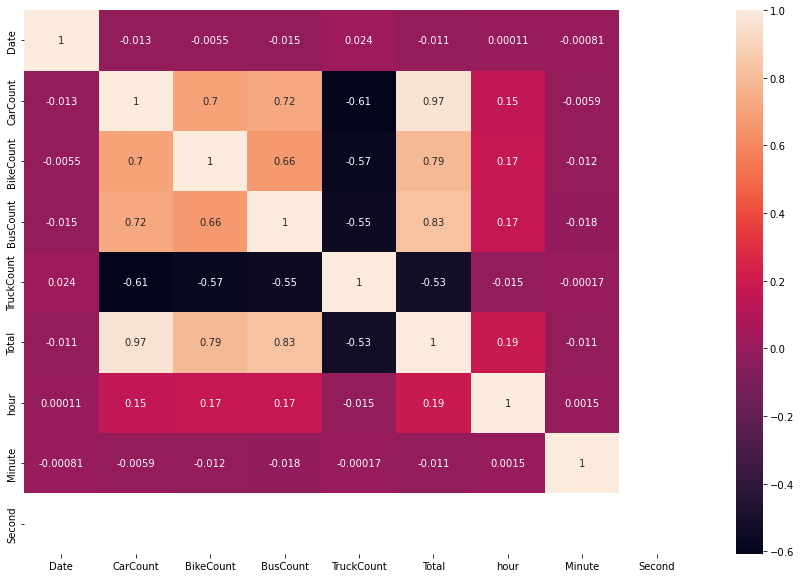

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [88]:
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,Minute,Second
0,10,Tuesday,31,0,4,4,39,low,0,0,0
1,10,Tuesday,49,0,3,3,55,low,0,15,0
2,10,Tuesday,46,0,3,6,55,low,0,30,0
3,10,Tuesday,51,0,2,5,58,low,0,45,0
4,10,Tuesday,57,6,15,16,94,normal,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,Thursday,16,3,1,36,56,normal,22,45,0
2972,9,Thursday,11,0,1,30,42,normal,23,0,0
2973,9,Thursday,15,4,1,25,45,normal,23,15,0
2974,9,Thursday,16,5,0,27,48,normal,23,30,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CarCount', ylabel='Density'>

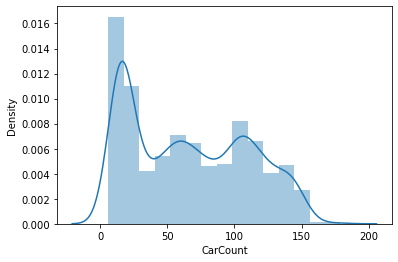

In [89]:
sns.distplot(df['CarCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BikeCount', ylabel='Density'>

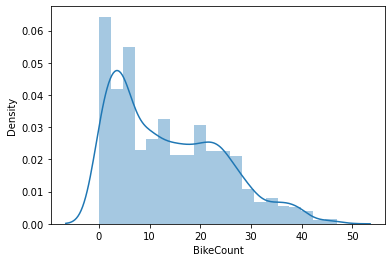

In [90]:
sns.distplot(df['BikeCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BusCount', ylabel='Density'>

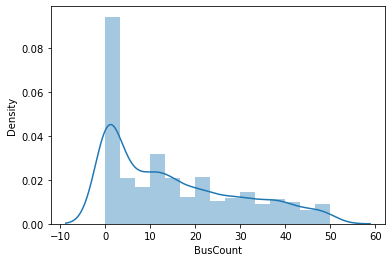

In [91]:
sns.distplot(df['BusCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TruckCount', ylabel='Density'>

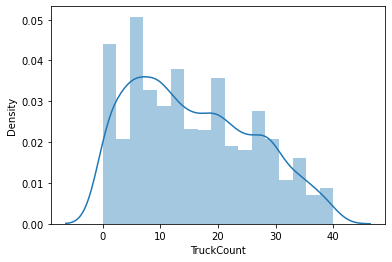

In [92]:
sns.distplot(df['TruckCount'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

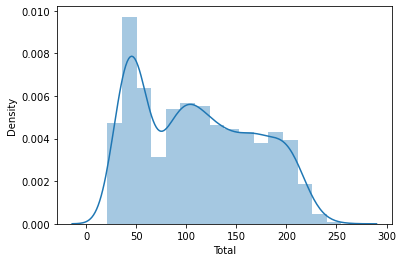

In [93]:
sns.distplot(df['Total'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

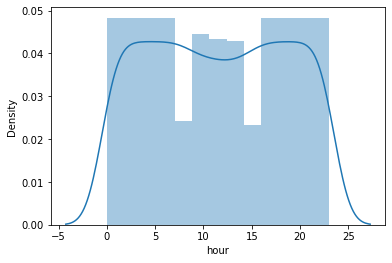

In [94]:
sns.distplot(df['hour'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minute', ylabel='Density'>

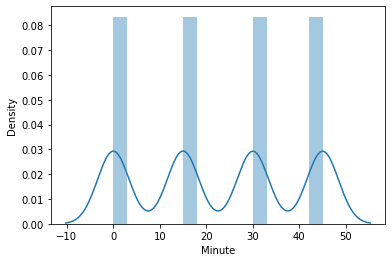

In [95]:
sns.distplot(df['Minute'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Second', ylabel='Density'>

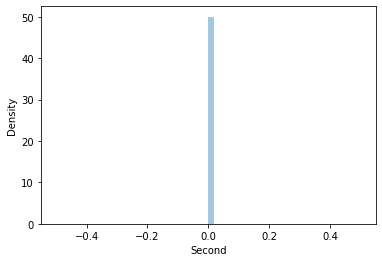

In [96]:
sns.distplot(df['Second'])

In [97]:
df=df.drop('BikeCount',axis=1)


In [98]:
le=LabelEncoder()


In [99]:
df['Day of the week']=le.fit_transform(df['Day of the week'])


In [100]:
df['Traffic Situation']=le.fit_transform(df['Traffic Situation'])

In [101]:
df

,Date,Day of the week,CarCount,BusCount,TruckCount,Total,Traffic Situation,hour,Minute,Second
0,10,5,31,4,4,39,2,0,0,0
1,10,5,49,3,3,55,2,0,15,0
2,10,5,46,3,6,55,2,0,30,0
3,10,5,51,2,5,58,2,0,45,0
4,10,5,57,15,16,94,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,1,36,56,3,22,45,0
2972,9,4,11,1,30,42,3,23,0,0
2973,9,4,15,1,25,45,3,23,15,0
2974,9,4,16,0,27,48,3,23,30,0


In [102]:
df['Traffic Situation'].value_counts()

3    1669
0     605
1     321
2     304
Name: Traffic Situation, dtype: int64

In [103]:
y=df['Traffic Situation']

In [104]:
X=df.drop('Traffic Situation',axis=1)

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
smote=SMOTE()

In [107]:
X_sm,y_sm=smote.fit_resample(X,y)


In [108]:
sc=StandardScaler()

In [109]:
X_sm=sc.fit_transform(X_sm)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

# RandomForestClassifier

In [111]:
rfc=RandomForestClassifier()



In [112]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
y_pred=rfc.predict(X_train)


In [114]:
accuracy_score(y_train,y_pred)

1.0

In [115]:
y_pred=rfc.predict(X_test)


In [116]:
accuracy_score(y_test,y_pred)

0.9970059880239521

In [117]:
KF=KFold(5)


In [118]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [119]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9925373134328358
1 1.0
2 0.9962546816479401
3 0.9962546816479401
4 0.9887640449438202


In [120]:
scores.mean()

0.9947621443345073

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       348
           1       1.00      1.00      1.00       310
           2       1.00      1.00      1.00       332
           3       1.00      0.99      0.99       346

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



# LogisticRegression

In [122]:
lr=LogisticRegression()


In [123]:
lr.fit(X_train,y_train)

LogisticRegression()

In [124]:
y_pred=lr.predict(X_train)


In [125]:
accuracy_score(y_train,y_pred)

0.9228464419475655

In [126]:
y_pred=lr.predict(X_test)


In [127]:
accuracy_score(y_test,y_pred)

0.9184131736526946

In [128]:
KF=KFold(5)


In [129]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [130]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9104477611940298
1 0.9063670411985019
2 0.8876404494382022
3 0.9176029962546817
4 0.8876404494382022


In [131]:
scores.mean()

0.9019397395047235

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       348
           1       0.90      0.97      0.93       310
           2       0.88      0.94      0.91       332
           3       0.91      0.78      0.84       346

    accuracy                           0.92      1336
   macro avg       0.92      0.92      0.92      1336
weighted avg       0.92      0.92      0.92      1336



# KNeighborsClassifier

In [133]:
knc=KNeighborsClassifier()


In [134]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
y_pred=knc.predict(X_train)


In [136]:
accuracy_score(y_train,y_pred)

0.9434456928838951

In [137]:
y_pred=knc.predict(X_test)


In [138]:
accuracy_score(y_test,y_pred)

0.9154191616766467

In [139]:
KF=KFold(5)


In [140]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [141]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8470149253731343
1 0.8838951310861424
2 0.8127340823970037
3 0.8726591760299626
4 0.8426966292134831


In [142]:
scores.mean()

0.8517999888199451

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       348
           1       0.85      0.99      0.91       310
           2       0.88      0.99      0.94       332
           3       0.99      0.74      0.85       346

    accuracy                           0.92      1336
   macro avg       0.92      0.92      0.91      1336
weighted avg       0.92      0.92      0.91      1336



# XGBClassifier

In [144]:
xgb_i=xgb.XGBClassifier()

In [145]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [146]:
y_pred=xgb_i.predict(X_train)


In [147]:
accuracy_score(y_train,y_pred)

1.0

In [148]:
y_pred=xgb_i.predict(X_test)


In [149]:
accuracy_score(y_test,y_pred)

0.9977544910179641

In [150]:
KF=KFold(5)


In [151]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [152]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.996268656716418
1 0.9962546816479401
2 0.9962546816479401
3 0.9962546816479401
4 0.9887640449438202


In [153]:
scores.mean()

0.9947593493208118

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       348
           1       1.00      1.00      1.00       310
           2       1.00      1.00      1.00       332
           3       1.00      0.99      1.00       346

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



# DecisionTreeClassifier

In [155]:
dtc=DecisionTreeClassifier()


In [156]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
y_pred=dtc.predict(X_train)


In [158]:
accuracy_score(y_train,y_pred)

1.0

In [159]:
y_pred=dtc.predict(X_test)


In [160]:
accuracy_score(y_test,y_pred)

0.999251497005988

In [161]:
KF=KFold(5)


In [162]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [163]:
for idx,value in enumerate(scores):
    print(idx,value)

0 1.0
1 1.0
2 1.0
3 0.9887640449438202
4 0.9925093632958801


In [164]:
scores.mean()

0.99625468164794

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      1.00      1.00       310
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       346

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336

